In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx 

In [2]:
f = open('string_interactions.tsv', 'r')

In [3]:
node1 = []
node2 = []

for line in f:
    
    line = line.split()
    

    node1.append(line[0])
    node2.append(line[1])
    
node2.remove('node2')
node1.remove('#node1')  

In [4]:
n1uq = set(node1)
n2uq = set(node2)
n1uq = list(n1uq)
n2uq = list(n2uq)
n1uq.extend(n2uq)
nodes = list(set(n1uq))

In [5]:
dict_ = {}

for n in nodes:
    dict_[n] = []
    

for node in nodes:
    for i in range(len(node1)):
        if  node == node1[i]:
            if node2[i] not in dict_[node]:
                dict_[node].append(node2[i])
                
for node in nodes:                
    for j in range(len(node2)):
        if node == node2[j]:
            if node1[j] not in dict_[node]:
                dict_[node].append(node1[j])

In [6]:
adj_matrix =  np.zeros((len(dict_), len(dict_)))
adj_list = dict_


In [7]:
for i in range(len(nodes)):
    
    for j in range(len(nodes)):
        if nodes[j]  in adj_list[nodes[i]]:
            
            adj_matrix[i][j] = 1
    

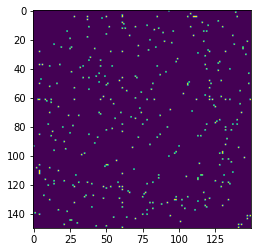

In [8]:
plt.imshow(adj_matrix)

In [18]:
from PIL import Image
import os

array = np.zeros((len(adj_matrix), len(adj_matrix)))

# Set grey value to black or white depending on x position
for x in range(len(adj_matrix)):
    for y in range(len(adj_matrix)):
        if adj_matrix[x,y] == 0:
            array[y, x] = 0
        else:
            array[y, x] = 255

img = Image.fromarray(array)
if img.mode != 'RGB':
    img = img.convert('RGB')
img.save('graph.png')

In [12]:
degree = []

for node in nodes:
    
    degree.append(len(adj_list[node]))

(array([104.,  24.,  15.,   4.,   1.,   0.,   1.,   0.,   0.,   1.]),
 array([ 1. ,  2.4,  3.8,  5.2,  6.6,  8. ,  9.4, 10.8, 12.2, 13.6, 15. ]),
 <BarContainer object of 10 artists>)

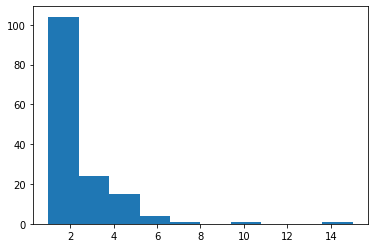

In [41]:
plt.hist(degree, bins = 10)

In [27]:
deg = np.array(degree)
np.where(deg == np.max(deg))

(array([112]),)

In [28]:
nodes[112]

'TNF'

In [92]:
graph = nx.Graph()

for node in nodes:
    graph.add_node(node, size =1)
    
    


for i in range(len(adj_matrix)):
    for j in range(len(adj_matrix[i])):
        if adj_matrix[i,j] == 1:
            graph.add_edge(nodes[i], nodes[j])
            
pos_ = nx.spring_layout(graph, iterations=5, k = 1.5)


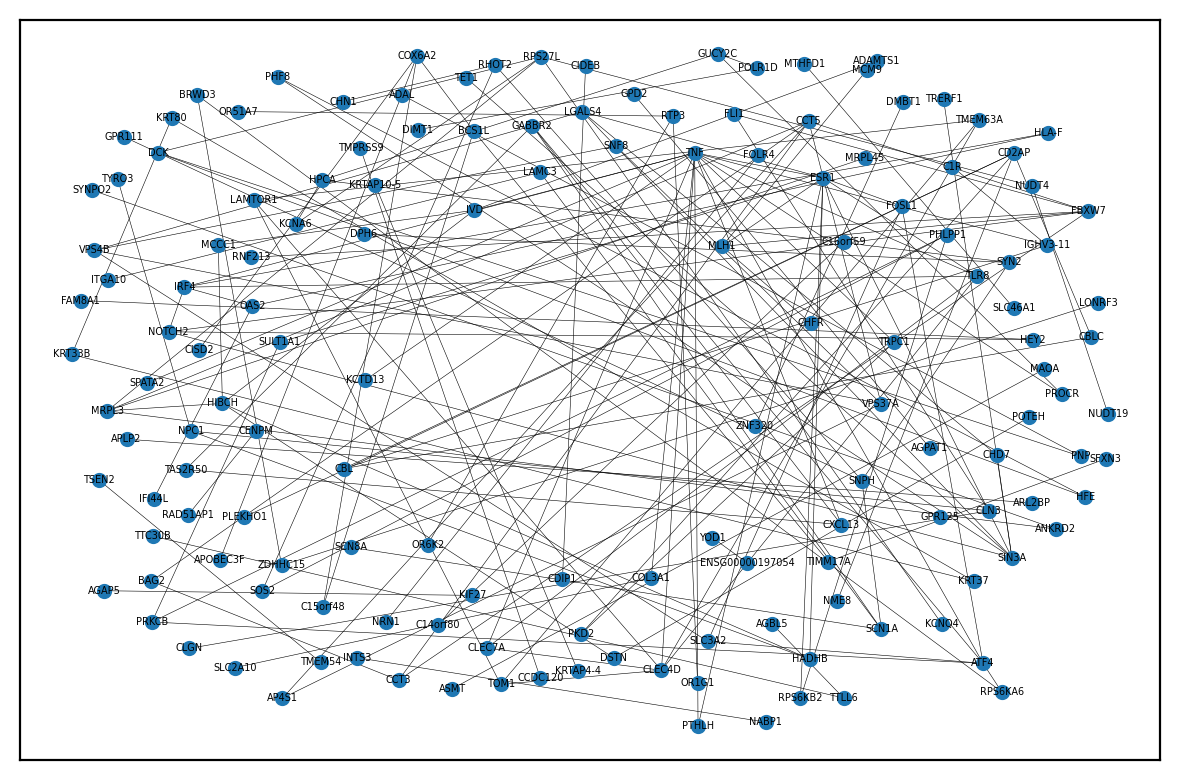

In [101]:
plt.figure(dpi = 200)
nx.draw_networkx(graph, pos_, node_size = 20,font_size =3.5,width = 0.2 )
plt.tight_layout()
#plt.show()
plt.savefig("Graph.png", format="PNG")